<a href="https://colab.research.google.com/github/mylenefarias/mylene/blob/main/HCIstats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Basic Statistical Methods for HCI**

This is a simple notebook with basic concepts of statistics applied to HCI and experimental design. This is in no way representative of all possible.

The code was adapted from:
*  https://goldinlocks.github.io/Basic-Experimental-Design-in-Python/
* https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/
* https://www.kaggle.com/code/shivanirana63/guide-to-complete-statistical-analysis

##**1. Definitions**

*Degrees of Freedom*

* Degrees of Freedom (df) refers to the maximum number of logically independent values, which are values that have the freedom to vary, in the data sample or the number of independent pieces of information that went into calculating the estimate. It’s not quite the same as the number of items in the sample. In order to get the df for the estimate, you have to subtract 1 from the number of items. Let’s say you were finding the mean weight loss for a low-carb diet. You could use 4 people, giving 3 degrees of freedom (4 – 1 = 3), or you could use 100 people with df = 99.

* The degrees of freedom for the chi-squared distribution is calculated based on the size of the contingency table as: degrees of freedom = (rows - 1) * (cols - 1)

*Hypothesis tests*

* Null hypothesis (H0) - A = B and the observed patterns are the product of random chance
* Alternative hypothesis (H1) - A != B and the difference between samples represents a real difference between the populations

*p-value*
- The likelihood that the distribution of values would occur if the null hypothesis were correct. We cant be be 100% sure that are pattern couldn't have emerged due to random chance, but we can quantify the probability that random chance will produce a given pattern. The smaller the p-value the less likely it is that the null hypothesis can account for our observations.

*alpha*
- Crucial threshold of p-value
- Usually alpha < 0.05: reject null hypothesis

*Signifcance*

In terms of a p-value and a chosen significance level (alpha), the test can be interpreted as follows:

* If p-value <= alpha: significant result, reject null hypothesis (H0), dependent.
* If p-value > alpha: not significant result, fail to reject null hypothesis (H0), independent.

For the test to be effective, at least five observations are required in each cell of the contingency table.

##**2. Common Methods**

*Descriptive Statistics*
* Central Tendency: Mean, Median, Mode
* Measures of Spread: Range, Variance, Standard deviations

*Normality Tests*
* Shapiro-Wilk Test
* D’Agostino’s K^2 Test
* Anderson-Darling Test

*Correlation Tests*
* Pearson’s Correlation Coefficient
* Spearman’s Rank Correlation
* Kendall’s Rank Correlation
* Chi-Squared Test

*Parametric Statistical Hypothesis Tests*
* Student’s t-test
* Paired Student’s t-test
* Analysis of Variance Test (ANOVA)
* Repeated Measures ANOVA Test

*Nonparametric Statistical Hypothesis Tests*
* Mann-Whitney U Test
* Wilcoxon Signed-Rank Test
* Kruskal-Wallis H Test
* Friedman Test

We use the follwoing methods to compare the `means'. The exact method depends on the
* experimental design
* number of independent variables
* number of conditions
* normality



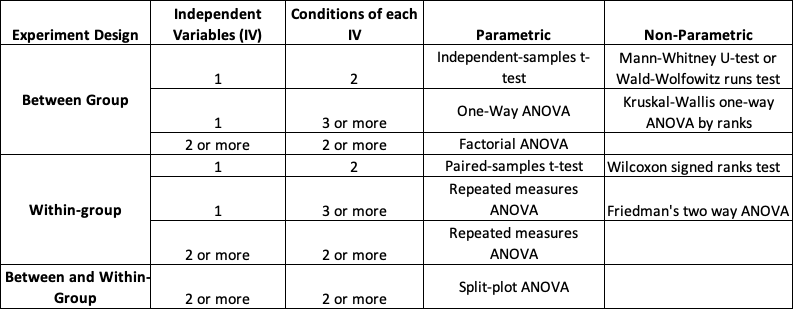

##**3. Jupyter and Colab Basics**

In [10]:
# Mount Google drive
from google.colab import drive
drive.mount('/content/drive')
dir

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<function dir>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

In [12]:
# sample data for the examples in this notebook
filename = r'/content/sample_data/weight-height.csv'
import csv
open(filename)

<_io.TextIOWrapper name='/content/sample_data/weight-height.csv' mode='r' encoding='UTF-8'>

In [13]:
People = pd.read_csv('/content/sample_data/weight-height.csv')
People.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [14]:
People.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


##**4. Student's t-test**
The t-test tells you how significant the differences between groups are; In other words it lets you know if those differences (measured in means or averages) could have happened by random chance.

*Two basic types:*

- One-sample: Mean of population different from a given value?
- Two-sample: Two population means equal?

###**4.1 First t-test**
We want to compare the mean heights in cm of the Sample_A group with a given value. We want to see whether the mean weight of the people in this sample is significantly different from the chosen cut-off point of 65 kg. We will use a one-sample t-test, which allows us to compare the mean of a sample with a chosen value. We will perform this test on the sample provided versus the crucial value of 65 kg, and test its significance by comparing the value of alpha to the p-value.

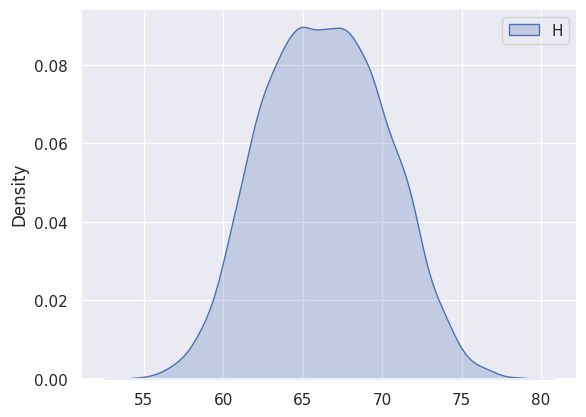

In [15]:
# Get Sample
Sample_A = People.Height.values

sns.kdeplot(Sample_A, fill=True, color="b")
# A kernel density estimate (KDE) plot is a method for visualizing the distribution of
# observations in a dataset, analogous to a histogram. KDE represents the data using a
# continuous probability density curve in one or more dimensions.
plt.legend(('Height'))
plt.show()

In [16]:
from scipy import stats

# Perform t-test and print result
t_result = stats.ttest_1samp(Sample_A, 65)

# Test significance
alpha = 0.05
if (t_result[1] < alpha):
    print(f"mean value of Sample A differs from given value \np-value: {t_result[1]}")
else:
    print(f"No significant difference found \np-value: {t_result[1]}")

mean value of Sample A differs from given value 
p-value: 1.089548024807223e-260


###**4.2 Two-sample t-test**

Now we'll compare two sets of samples. Again, we'll be looking at the weight (weight of males and females) but this time we're going to compare the weight of **males** with **females**.

- Does the mean weight differ between the two genders?

A two-sample t-test can tell us whether the means of two samples differ significantly.

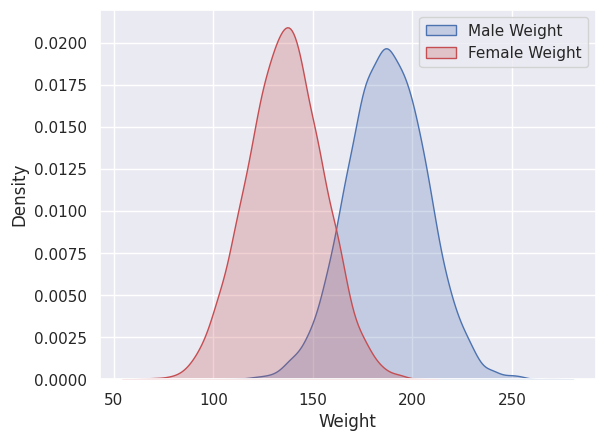

In [17]:
# Get Sample
Sample_A = People[People['Gender']=='Male']['Weight']
Sample_B = People[People['Gender']=='Female']['Weight']

sns.kdeplot(Sample_A, fill=True, color="b")
sns.kdeplot(Sample_B, fill=True, color="r")
plt.legend(('Male Weight', 'Female Weight'))
plt.show()

In [18]:
#Calculate the T-test for the means of two independent samples of scores.
t_result = stats.ttest_ind(Sample_A, Sample_B)

alpha = 0.05
if (t_result[1] < alpha):
    print(f"mean value of Sample A differs from Sample_B \np-value: {t_result[1]}")
else:
    print(f"No significant difference found \np-value: {t_result[1]}")

mean value of Sample A differs from Sample_B 
p-value: 0.0


In [19]:
# Another example of the Student's t-test
from scipy.stats import ttest_ind
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=-0.326, p=0.748
Probably the same distribution


###**4.3 Paired t-test**

A paired t-test is used to determine whether the mean difference between two sets of observations is zero. In a paired sample t-test, **each subject or entity is measured twice, resulting in pairs of observations.**

* Controls for individual variation.
* Increases statistical power by reducing noise.

Here, we have a small DataFrame (podataframe) containing information on 10 Fields. We are interested in potato yield in tons/hectare. For each Field, we have a value for its Yield2018, before the application of a new fertilizer, and its Yield2019, after the application of the new fertilizer. We will perform two t-tests, a standard two-sample test, and a paired t-test. A paired t-test will control for the variation between fields.

In [20]:
yields2018 = [60.2, 12, 13.8, 91.8, 50, 27, 71.1, 41, 31, 55.9]
yields2019 = [63.2, 15.6, 14.8, 96.7, 53, 29.9, 73, 44.4, 38, 57.3]

podataframe = pd.DataFrame({'Yield2018': yields2018,
                            'Yield2019' : yields2019})
print(podataframe)

   Yield2018  Yield2019
0       60.2       63.2
1       12.0       15.6
2       13.8       14.8
3       91.8       96.7
4       50.0       53.0
5       27.0       29.9
6       71.1       73.0
7       41.0       44.4
8       31.0       38.0
9       55.9       57.3


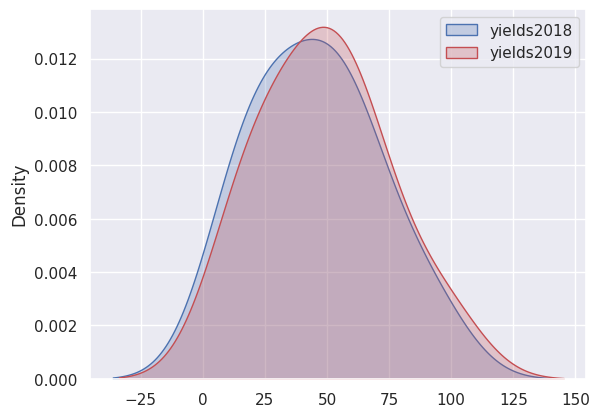

In [21]:
sns.kdeplot(yields2018, fill=True, color="b")
sns.kdeplot(yields2019, fill=True, color="r")
plt.legend(('yields2018', 'yields2019'))
plt.show()

In [22]:
# Perform independent t-test
ttestind = stats.ttest_ind(podataframe.Yield2018, podataframe.Yield2019)

print(f'Test Statistic = {round(ttestind[0],2)}, P-value = {round(ttestind[1],2)}')

Test Statistic = -0.28, P-value = 0.78


In [23]:
# Perform paired t-test
ttestpair = stats.ttest_rel(podataframe.Yield2018, podataframe.Yield2019)

print(f'Test Statistic = {round(ttestpair[0],2)}, P-value = {round(ttestpair[1],2)}')


Test Statistic = -5.81, P-value = 0.0


Recall, the paired test is more sensitive than the independent test and can pick up a difference that the independent test can't detect. This is because the difference within the samples each year (individual field effect) is quite large in comparison to the difference between the two years (effect of treatment). Paired tests are useful when a large variability exists.

In [24]:
# Another example of the Paired Student's t-test
from scipy.stats import ttest_rel
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_rel(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=-0.334, p=0.746
Probably the same distribution


##**5. Analysis of variance - ANOVA**
Analysis of variance (ANOVA) is used to analyze the differences among group means in a sample. ANOVA provides a statistical test of whether two or more population means are equal, and therefore generalizes the t-test beyond two means.

ANOVA uses F-tests to statistically test the equality of means. F-statistics are based on the ratio of mean squares. It is simply an estimate of population variance that accounts for the degrees of freedom (DF) used to calculate that estimate.

###**5.1 One Way ANOVA**

A one way ANOVA is used to compare two means from **two independent** (unrelated) groups using the F-distribution. The null hypothesis for the test is that the two means are equal. Therefore, a significant result means that the two means are unequal. A one way ANOVA will tell you that at least two groups were different from each other. But it won’t tell you which groups were different.

Now, we will work with the Olympics dataset to look at the relative success of the American swimming and athletics teams. How does the Weight of athletes vary between teams from different countries? We going to use a one-way ANOVA to check for the presence of significant variation in Weight of Olympic athletes. A one-way ANOVA will allow us to see whether any differences between these groups of values are significant.

In [26]:
athletes = pd.read_csv('https://assets.datacamp.com/production/repositories/4371/datasets/8fd0a14bfbc5f13719d92334eaf77b23f2e914d6/olyathswim.csv')
athletes.head()

,Unnamed: 0,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,City,Sport,Event,Medal
0,27,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Los Angeles,Athletics,Athletics Women's 100 metres,NaN
1,28,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN
2,30,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,Finland,FIN,1952 Summer,1952,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,NaN
3,36,Arvo Ossian Aaltonen,M,22.0,NaN,NaN,Finland,FIN,1912 Summer,1912,Stockholm,Swimming,Swimming Men's 200 metres Breaststroke,NaN
4,37,Arvo Ossian Aaltonen,M,22.0,NaN,NaN,Finland,FIN,1912 Summer,1912,Stockholm,Swimming,Swimming Men's 400 metres Breaststroke,NaN


In [29]:
athletes['Medal'].unique()

array([nan, 'Bronze', 'Silver', 'Gold'], dtype=object)

In [30]:
b = {'Bronze': True, 'Silver': True, 'Gold': True}
athletes['MedalTF'] = athletes['Medal'].map(b)
athletes['MedalTF'] = athletes['MedalTF'].fillna(False)
athletes['Medal'] = athletes['Medal'].fillna('None')
athletes = athletes.dropna()

In [31]:
athletes['MedalTF'].unique()

array([False,  True])

In [32]:
# Create a table of cross-tabulations
table = pd.crosstab(athletes.MedalTF, athletes.Sport)
print(table)

# Perform the Fisher exact test
fisher = stats.fisher_exact(table, alternative='two-sided')

# Is the result significant?
alpha = 0.05
if fisher[1] <= alpha:
    print(f"\nProportions of medal winners differ significantly \np-value: {fisher[1]}")
else:
    print(f"\nNo significant difference in proportions of medal winners found \np-value: {fisher[1]}")

Sport    Athletics  Swimming
MedalTF                     
False        28726     16290
True          3648      2486

Proportions of medal winners differ significantly 
p-value: 5.091646967937521e-11


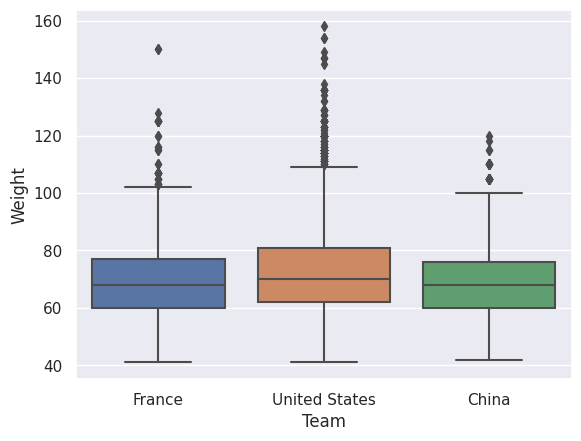

In [27]:
sns.boxplot(x="Team", y="Weight",
                 data=athletes[athletes['Team'].isin(['United States','China', 'France'])]);


In [33]:
# Create arrays
France_athletes = athletes[athletes.Team == 'France'].Weight
US_athletes = athletes[athletes.Team == 'United States'].Weight
China_athletes = athletes[athletes.Team == 'China'].Weight

# Perform one-way ANOVA
anova = stats.f_oneway(France_athletes, US_athletes, China_athletes)
print(f'Test Statistic = {round(anova[0],2)}, P-value = {round(anova[1],3)}')


Test Statistic = 55.63, P-value = 0.0


According to this test, significant differences exist between the weights of athletes for each country.

In [34]:
# ANOTHER Example of the Analysis of Variance Test
from scipy.stats import f_oneway
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
stat, p = f_oneway(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.096, p=0.908
Probably the same distribution


###**5.2 Two Way ANOVA**

The two-way ANOVA compares the mean differences between **groups that have been split on two independent variables** (called factors). The primary purpose of a two-way ANOVA is to understand if there is an interaction between the two independent variables on the dependent variable. For example, you could use a two-way ANOVA to understand whether there is an interaction between gender and educational level on test anxiety, where gender (males/females) and education level (undergraduate/postgraduate) are your independent variables, and test anxiety is your dependent variable.

Let's have another look at some data from our Olympic dataset. How does the Weight of athletes vary between teams from different countries and of different sexes? We are going to use a two-way ANOVA to check for the presence of significant variation in the Weight of Olympic sprinters. A two-way ANOVA will allow you to see which of these two factors, Sex and Team, have a significant effect on Weight.

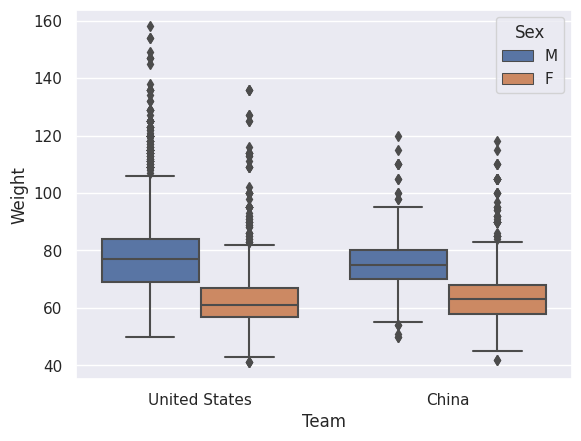

In [35]:
sns.boxplot(x="Team", y="Weight", hue="Sex",
                 data=athletes[athletes['Team'].isin(['United States','China'])]);


In [36]:
import statsmodels.api as sm

# Create model
formula = 'Weight ~ Sex + Team'
model = sm.formula.ols(formula, data=athletes).fit()

# Perform ANOVA and print table
aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table)


                sum_sq       df             F  PR(>F)
Sex       2.639780e+06      1.0  20144.562135     0.0
Team      9.344392e+05    228.0     31.275651     0.0
Residual  6.672648e+06  50920.0           NaN     NaN


According to the results of your ANOVA, Sex and Team has a significant effect.

###**5.3 Repeated Measures ANOVA Test**

Tests whether the means of two or more paired samples are significantly different.

Assumptions

* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample are normally distributed.
* Observations in each sample have the same variance.
* Observations across each sample are paired.

Interpretation

* H0: the means of the samples are equal.
* H1: one or more of the means of the samples are unequal.


In [47]:
from statsmodels.stats.anova import AnovaRM

flanks = pd.read_csv('/content/sample_data/flanks.csv')
flanks.head()

,Unnamed: 0,SubID,TrialType,RT,ACC
0,0,3,congruent,768,1
1,1,3,incongruent,561,1
2,2,3,congruent,442,1
3,3,3,incongruent,503,1
4,4,3,congruent,410,1


In [46]:
aovrm = AnovaRM(flanks, 'RT', 'SubID', within=['TrialType'], aggregate_func='mean')
res = aovrm.fit()
print(res)

                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
TrialType 24.7527 1.0000 19.0000 0.0001



##**6. Interactive effects**

Interaction effects represent the combined effects of factors on the dependent measure. When an interaction effect is present, the impact of one factor depends on the level of the other factor. Part of the power of ANOVA is the ability to estimate and test interaction effects. As Pedhazur and Schmelkin note, the idea that multiple effects should be studied in research rather than the isolated effects of single variables is one of the important contributions of Sir Ronald Fisher. When interaction effects are present, it means that interpretation of the main effects is incomplete or misleading. For example, the relationship between condiments and enjoyment probably depends on the type of food.

###**6.1 Two-way ANOVA with interactive effects**

Once again, we are going to look at our dataset of Olympic athletes. As in previous exercises, we will be looking at the variation in athlete Weight. We are going to look at athletes of either Sex competing in one of two Events: the 100 meter and 10,000 meter run. An ANOVA will allow us to work out which of these variables affect Weight and whether an interactive effect is present.



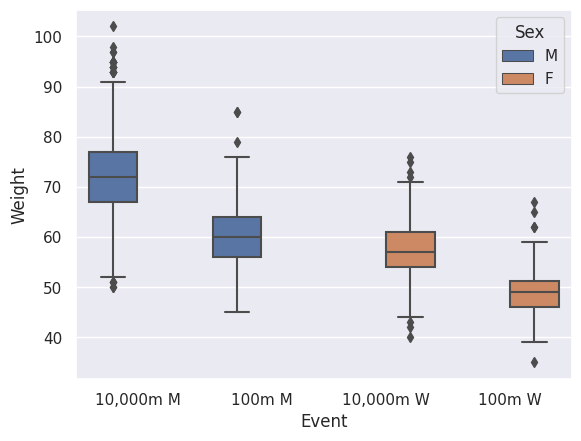

In [48]:
df = athletes[athletes['Event'].isin(["Athletics Men's 10,000 metres",
                                      "Athletics Men's 100 metres",
                                      "Athletics Women's 10,000 metres",
                                      "Athletics Women's 100 metres"])]

ax = sns.boxplot(data=df, x="Event", y="Weight", hue="Sex")
ax.set_xticklabels(['10,000m M','100m M','10,000m W','100m W']);

In [49]:
# Create model
formula = 'Weight ~ Sex + Event + Sex:Event'
model = sm.formula.ols(formula, data=athletes).fit()

# Perform ANOVA and print table
aov_table = sm.stats.anova_lm(model)
print(aov_table)

                df        sum_sq       mean_sq             F    PR(>F)
Sex            1.0  2.521601e+06  2.521601e+06  44267.620977  0.000000
Event        126.0  4.700904e+06  3.730876e+04    654.968815  0.000000
Sex:Event    126.0  8.853525e+03  7.026607e+01      1.233546  0.038783
Residual   51023.0  2.906406e+06  5.696266e+01           NaN       NaN


Look at the p-values for the effects of Sex, Event, and Sex:Event. Using a standard alpha of 0.05, Sex, Event, and Sex:Event have a significant effect on Weight. This means that both factors influence Weight, and the effect of one factor is dependent on the other.



###**6.2 Three-way ANOVA with interactive effects**

In [50]:
# Create model
formula = 'Weight ~ Sex +  Event + Age + Sex:Event + Sex:Age + Sex:Event:Age'
model = sm.formula.ols(formula, data=athletes).fit()

# Perform ANOVA and print table
aov_table = sm.stats.anova_lm(model)
pd.DataFrame(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
Sex,1.0,2.521601e+06,2.521601e+06,45969.316958,0.000000e+00
Event,126.0,4.700904e+06,3.730876e+04,680.146535,0.000000e+00
Sex:Event,126.0,8.820781e+03,7.000619e+01,1.276228,1.989222e-02
Age,1.0,6.732883e+04,6.732883e+04,1227.418595,9.874046e-266
Sex:Age,1.0,1.687419e+03,1.687419e+03,30.761992,2.931413e-08
Sex:Event:Age,252.0,5.434732e+04,2.156640e+02,3.931599,5.392838e-87
Residual,50901.0,2.792124e+06,5.485401e+01,NaN,NaN


##**7. Testing for normality**

###**7.1 Shapiro-Wilk test**

The Shapiro-Wilk test is a way to tell if a set of observations comes from a normal distribution. The test gives you a 𝑊 value; small values indicate your sample is not normally distributed (you can reject the null hypothesis that your population is normally distributed if your values are under a certain threshold).

* If the p value is less than the chosen alpha level, then the null hypothesis is rejected and there is evidence that the data tested are not normally distributed.
* If the p value is greater than the chosen alpha level, then the null hypothesis that the data came from a normally distributed population cannot be rejected .

In [51]:
pd.set_option('display.max_columns', None)
countrydata = pd.read_csv('https://assets.datacamp.com/production/repositories/4371/datasets/f5c1016b818f97ec200236fb161ae711944fb2cb/undata_country_profile_variables.csv')
countrydata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 50 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   country                                                     229 non-null    object 
 1   Region                                                      229 non-null    object 
 2   Surface area (km2)                                          226 non-null    object 
 3   Population in thousands (2017)                              229 non-null    int64  
 4   Population density (per km2, 2017)                          229 non-null    float64
 5   Sex ratio (m per 100 f, 2017)                               227 non-null    float64
 6   GDP: Gross domestic product (million current US$)           208 non-null    float64
 7   GDP growth rate (annual %, const. 2005 prices)              208 non-null    object 
 8   

In [52]:
countrydata['Unemployment (% of labour force)'].replace('...', np.nan, inplace=True)
countrydata['Unemployment (% of labour force)'] = countrydata['Unemployment (% of labour force)'].astype(float)


Now, we will look at at country-level Unemployment and GDP per capita (GDP_per_cap) data. We will use a Shapiro-Wilk test to examine whether the distribution of values seen in these samples, as seen in the Q-Q plots below, departs significantly from the normal distribution. This test tells us how closely a given sample fits the patterns expected from a normal distribution.

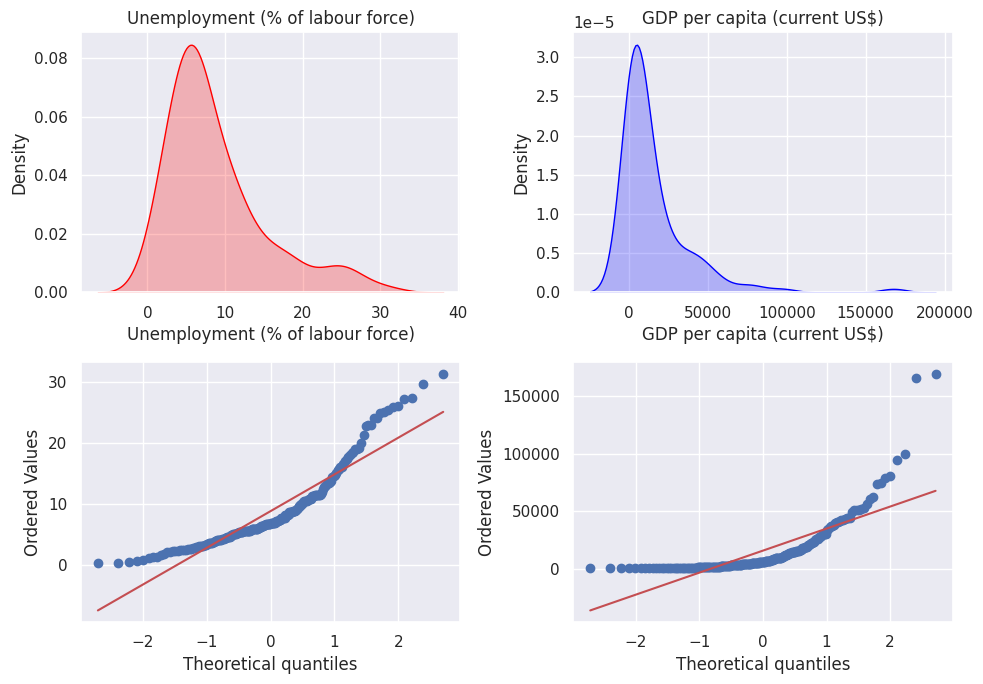

In [53]:
from scipy.stats import probplot
import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots(2,2, figsize=(10,7))

sns.kdeplot(countrydata['Unemployment (% of labour force)'].dropna(), ax=ax[0][0], color='red', shade=True, legend=False)
sns.kdeplot(countrydata['GDP per capita (current US$)'].dropna(), ax=ax[0][1], color='blue', shade=True, legend=False)

probplot(countrydata['Unemployment (% of labour force)'].dropna(), plot=ax[1][0])
probplot(countrydata['GDP per capita (current US$)'].dropna(), plot=ax[1][1])

ax[0][0].set_title('Unemployment (% of labour force)')
ax[0][1].set_title('GDP per capita (current US$)')

ax[1][0].set_title('')
ax[1][1].set_title('')

plt.tight_layout()
plt.show()

In [54]:
# Perform Shapiro-Wilk test on Unemployment and print result
shapiroUnem = stats.shapiro(countrydata['Unemployment (% of labour force)'].dropna())

print(f'W: {round(shapiroUnem[0],3)}, P-value: {round(shapiroUnem[1],3)}')


W: 0.868, P-value: 0.0


In [55]:
# Perform Shapiro-Wilk test on GDP_per_cap and print result
shapiroGDP = stats.shapiro(countrydata['GDP per capita (current US$)'].dropna())

print(f'W: {round(shapiroGDP[0],3)}, P-value: {round(shapiroGDP[1],3)}')


W: 0.63, P-value: 0.0


Both distributions are non-normal.

In [56]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.895, p=0.193
Probably Gaussian


###**7.2 Anderson-Darling Test**

The Anderson-Darling Goodness of Fit Test (AD-Test) is a measure of how well your data fits a specified distribution. It’s commonly used as a test for normality.

**Assumptions:**

* H0: the sample has a Gaussian distribution.
* H1: the sample does not have a Gaussian distribution.

In [57]:
# Example of the Anderson-Darling Normality Test
data = countrydata['GDP per capita (current US$)'].dropna()
result = stats.anderson(data)

print('stat=%.3f' % (result.statistic))

for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('\nProbably Gaussian at the %.1f%% level' % (sl))
    else:
        print('\nProbably not Gaussian at the %.1f%% level' % (sl))


stat=22.048

Probably not Gaussian at the 15.0% level

Probably not Gaussian at the 10.0% level

Probably not Gaussian at the 5.0% level

Probably not Gaussian at the 2.5% level

Probably not Gaussian at the 1.0% level


In [58]:
# Example of the Anderson-Darling Normality Test
data = countrydata['Unemployment (% of labour force)'].dropna()
result = stats.anderson(data)

print('stat=%.3f' % (result.statistic))

for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('\nProbably Gaussian at the %.1f%% level' % (sl))
    else:
        print('\nProbably not Gaussian at the %.1f%% level' % (sl))

stat=8.507

Probably not Gaussian at the 15.0% level

Probably not Gaussian at the 10.0% level

Probably not Gaussian at the 5.0% level

Probably not Gaussian at the 2.5% level

Probably not Gaussian at the 1.0% level


In [59]:
# Example of the Anderson-Darling Normality Test
from scipy.stats import anderson
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
result = anderson(data)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < cv:
		print('Probably Gaussian at the %.1f%% level' % (sl))
	else:
		print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=0.424
Probably Gaussian at the 15.0% level
Probably Gaussian at the 10.0% level
Probably Gaussian at the 5.0% level
Probably Gaussian at the 2.5% level
Probably Gaussian at the 1.0% level


##**8. Parametric vs. Non-parametric tests**

A parametric statistical test makes an assumption about the population parameters and the distributions that the data came from. These types of test includes Student’s T tests and ANOVA tests, which assume data is from a normal distribution.

The opposite is a nonparametric test, which doesn’t assume anything about the population parameters. Nonparametric tests include chi-square, Fisher’s exact test and the Mann-Whitney test.

Every parametric test has a nonparametric equivalent. For example, if you have parametric data from two independent groups, you can run a 2 sample t test to compare means. If you have nonparametric data, you can run a Wilcoxon rank-sum test to compare means.

###**8.1 Wilcoxon rank-sum (Mann–Whitney U test)**

* Non-parametric
* Not sensitive to distribution shape.

The Wilcoxon rank-sum test is a nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one population will be less than or greater than a randomly selected value from a second population. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Here we have the sex ratio of European Union and the United States (US_Sex_ratio) with the sex ratio of Asian countries (EU_Sex_ratio).

In [61]:
from scipy.stats import mannwhitneyu
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = mannwhitneyu(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably the same distribution')
else:
 print('Probably different distributions')

stat=40.000, p=0.473
Probably the same distribution



###**8.2 Wilcoxon signed-rank**

* Non-parametric equivalent to paired t-test
* Tests if ranks differ across pairs

The Wilcoxon signed-rank test is a non-parametric statistical hypothesis test used to compare two related samples, matched samples, or repeated measurements on a single sample to assess whether their population mean ranks differ (i.e. it is a paired difference test). It can be used as an alternative to the paired Student's t-test when the distribution of the differences between the two samples cannot be assumed to be normally distributed. A Wilcoxon signed-rank test is a nonparametric test that can be used to determine whether two dependent samples were selected from populations having the same distribution.

We are interested in potato yield in tons/hectare, as seen in previous exercises. For each Field, we have a value for Yield2018, before the application of a new fertilizer, and Yield2019, after the application of the new fertilizer. Does the yield differ significantly between years?

In [62]:
yields2018 = [60.2, 12.0, 13.8, 91.8, 50.0, 45.0, 32.0, 87.5, 60.1, 88.0, 11.3, 10.7, 12.7, 15.9, 16.0]
yields2019 = [63.2, 15.6, 14.8, 96.7, 53.0, 47.0, 31.3, 89.8, 67.8, 90.0, 14.2, 12.0, 13.9, 17.8, 20.0]

podataframe = pd.DataFrame({'Yield2018': yields2018,
                            'Yield2019' : yields2019})
print(podataframe)

    Yield2018  Yield2019
0        60.2       63.2
1        12.0       15.6
2        13.8       14.8
3        91.8       96.7
4        50.0       53.0
5        45.0       47.0
6        32.0       31.3
7        87.5       89.8
8        60.1       67.8
9        88.0       90.0
10       11.3       14.2
11       10.7       12.0
12       12.7       13.9
13       15.9       17.8
14       16.0       20.0


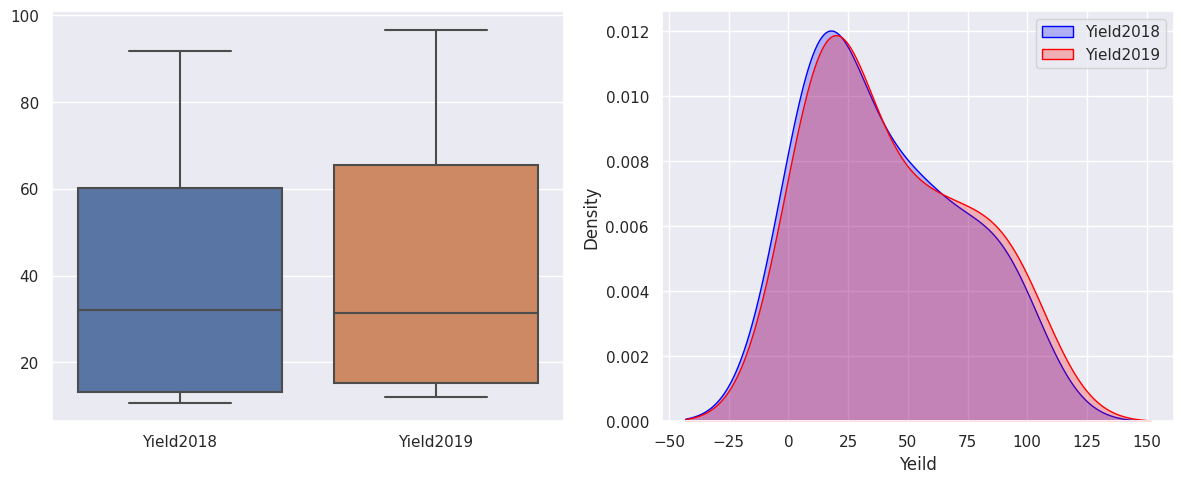

In [63]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
sns.boxplot(data=podataframe, ax=ax[0])
sns.kdeplot(podataframe.Yield2018, shade=True, color='blue', ax=ax[1])
sns.kdeplot(podataframe.Yield2019, shade=True, color='red', ax=ax[1])
ax[1].legend(('Yield2018', 'Yield2019'))
ax[1].set_xlabel('Yeild')
plt.tight_layout()
plt.show()

In [64]:
# Perform the two-sample t-test
t_result = stats.ttest_ind(podataframe.Yield2018, podataframe.Yield2019)
print(f'T-Test Test Statistic = {t_result[0]}, P-value = {t_result[1]}')

# Perform Shapiro-Wilk test on Yield2018 and print result
shapiroYield2018 = stats.shapiro(podataframe.Yield2018)
print(f'\nYield2018 W: {round(shapiroYield2018[0],3)}, P-value: {round(shapiroYield2018[1],3)}')

# Perform Shapiro-Wilk test on Yield2019 and print result
shapiroYield2019 = stats.shapiro(podataframe.Yield2019)
print(f'\nYield2019 W: {round(shapiroYield2019[0],3)}, P-value: {round(shapiroYield2019[1],3)}')

# Perform Wilcoxon Signed-Rank test
wilcsr = stats.wilcoxon(podataframe.Yield2018, podataframe.Yield2019)
print(f'\nWilcoxon Signed-Rank Test Statistic = {wilcsr[0]}, P-value = {wilcsr[1]}')

T-Test Test Statistic = -0.23488929598202465, P-value = 0.816003972907755

Yield2018 W: 0.836, P-value: 0.011

Yield2019 W: 0.844, P-value: 0.014

Wilcoxon Signed-Rank Test Statistic = 1.0, P-value = 0.0001220703125


Note that both of your Shapiro-Wilks tests gave significant results, indicating non-normal distributions. The Wilcoxon test gives a higher p-value for the same data, due to its lower sensitivity. However, due to the low sample sizes and non-normal distributions, the Wilcoxon test is a better choice of test for this dataset.

In [65]:
# Example of the Wilcoxon Signed-Rank Test
from scipy.stats import wilcoxon
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = wilcoxon(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=21.000, p=0.557
Probably the same distribution



Once again we'll be using the Olympic dataset. Here we're going to compare the Height of athletes from both the Norwegian and Chinese Teams. Do they differ?

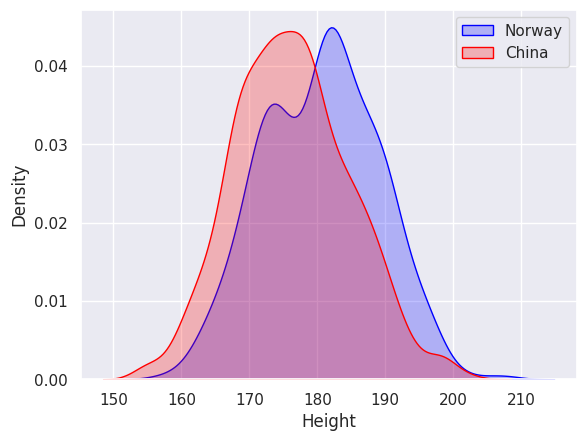

In [66]:
# Separate the heights by country
NorwayHeights = athletes[athletes['Team'] == "Norway"].Height
ChinaHeights = athletes[athletes['Team'] == "China"].Height

sns.kdeplot(NorwayHeights, shade=True, color='blue')
sns.kdeplot(ChinaHeights, shade=True, color='red')
plt.legend(('Norway', 'China'))
plt.xlabel('Height')
plt.show()

Do these two distributions look normal or not? First, we'll test whether these sets of samples follow a normal distribution, via a couple of Shapiro-Wilks tests. Then we'll choose what statistical test to use. Finally, we'll test the difference between the Norwegian and Chinese samples.

In [67]:
# Shapiro-wilks test on the heights
print(f'P-value:{stats.shapiro(NorwayHeights)[1]}')
print(f'\nP-value: {stats.shapiro(ChinaHeights)[1]}')

P-value:0.02972833625972271

P-value: 0.0002087375905830413


In [68]:
# Perform the Wilcoxon rank-sum test
wilc = stats.ranksums(NorwayHeights, ChinaHeights)
print(f'\nWilcoxon Rank-Sum Test Statistic = {wilc[0]}, P-value = {wilc[1]}')


Wilcoxon Rank-Sum Test Statistic = 7.6204282304741415, P-value = 2.5283551247666133e-14


###**8.3 Kruskal-Wallis H Test**

The Kruskal-Wallis test by ranks is a non-parametric method for testing whether samples originate from the same distribution. It is used for comparing two or more independent samples of equal or different sample sizes. It extends the Mann–Whitney U test, which is used for comparing only two groups. The parametric equivalent of the Kruskal–Wallis test is the one-way analysis of variance (ANOVA). Since it is a non-parametric method, the Kruskal–Wallis test does not assume a normal distribution of the residuals, unlike the analogous one-way analysis of variance.

Let's have another look at some data from our sex ratio dataset. How does the sex ratio of athletes vary between different countries? We going to use the Kruskal-Wallis H Test to check for the presence of significant variation in sex ratio of the population from different countries. A Kruskal-Wallis will allow us to see whether any differences between these groups of values are significant.

In [70]:
# Example of the Kruskal-Wallis H Test
from scipy.stats import kruskal
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = kruskal(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.571, p=0.450
Probably the same distribution


###**8.4  Friedman test**

The Friedman test is a non-parametric statistical test. Similar to the parametric repeated measures ANOVA, it is used to detect differences in treatments across multiple test attempts. The procedure involves ranking each row (or block) together, then considering the values of ranks by columns. Applicable to complete block designs, it is thus a special case of the Durbin test.

Classic examples of use are:

* 𝑛 wine judges each rate  𝑘 different wines. Are any of the k wines ranked consistently higher or lower than the others?
* 𝑛 welders each use  𝑘 welding torches, and the ensuing welds were rated on quality. Do any of the k torches produce consistently better or worse welds?

The Friedman test is used for one-way repeated measures analysis of variance by ranks. In its use of ranks it is similar to the Kruskal–Wallis one-way analysis of variance by ranks.

Here we are interested in potato yield in tons/hectare, as seen in previous exercises. For each Field, we have a value for Yield2018, before the application of a new fertilizer, Yield2019 and Yield2020, after the application of the new fertilizer. Does the yield differ significantly between years?

In [71]:
yields2018 = [60.2, 12.0, 13.8, 91.8, 50.0, 45.0, 32.0, 87.5, 60.1, 88.0, 11.3, 10.7, 12.7, 15.9, 16.0]
yields2019 = [63.2, 15.6, 14.8, 96.7, 53.0, 47.0, 31.3, 89.8, 67.8, 90.0, 14.2, 12.0, 13.9, 17.8, 20.0]
yields2020 = [65.2, 17.2, 15.5, 97.9, 55.5, 47.0, 33.5, 91.2, 68.8, 95.0, 16.1, 14.0, 14.1, 19.9, 24.0]


podataframe = pd.DataFrame({'Yield2018': yields2018,
                            'Yield2019' : yields2019,
                            'Yield2020' : yields2020})
print(podataframe)

    Yield2018  Yield2019  Yield2020
0        60.2       63.2       65.2
1        12.0       15.6       17.2
2        13.8       14.8       15.5
3        91.8       96.7       97.9
4        50.0       53.0       55.5
5        45.0       47.0       47.0
6        32.0       31.3       33.5
7        87.5       89.8       91.2
8        60.1       67.8       68.8
9        88.0       90.0       95.0
10       11.3       14.2       16.1
11       10.7       12.0       14.0
12       12.7       13.9       14.1
13       15.9       17.8       19.9
14       16.0       20.0       24.0


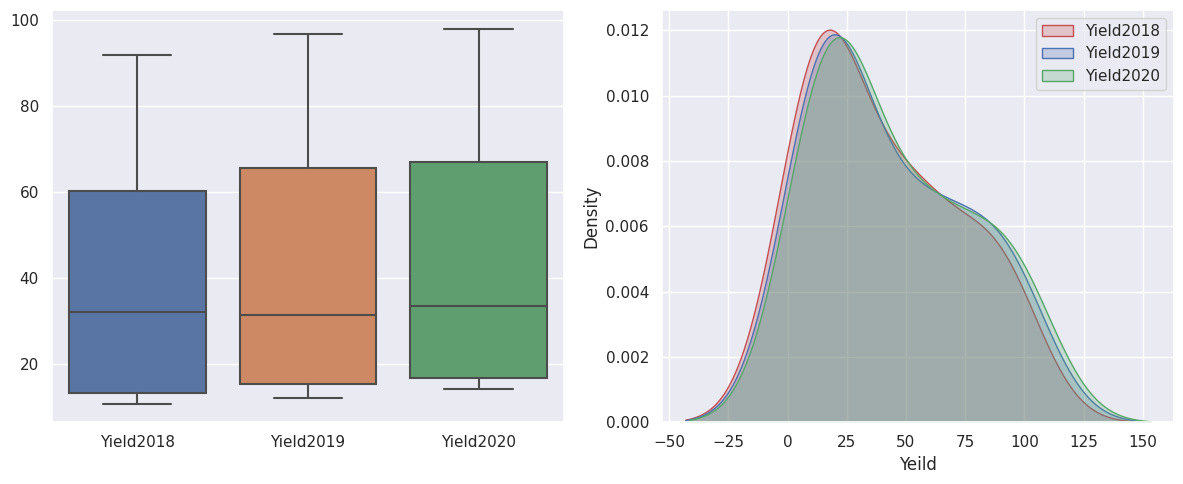

In [72]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
sns.boxplot(data=podataframe, ax=ax[0])
sns.kdeplot(podataframe.Yield2018, shade=True, color='r', ax=ax[1])
sns.kdeplot(podataframe.Yield2019, shade=True, color='b', ax=ax[1])
sns.kdeplot(podataframe.Yield2020, shade=True, color='g', ax=ax[1])

ax[1].legend(('Yield2018', 'Yield2019', 'Yield2020'))
ax[1].set_xlabel('Yeild')
plt.tight_layout()
plt.show()

In [73]:
# Example of the Friedman Test
stat, p = stats.friedmanchisquare(podataframe.Yield2018, podataframe.Yield2019, podataframe.Yield2020)

print('stat=%.3f, p=%.3f' % (stat, p))

if p >= 0.05:
    print('\nProbably the same distribution')
else:
    print('\nProbably different distributions')


stat=27.559, p=0.000

Probably different distributions


###**8.5  Non-parametric correlation**

**Spearman correlation**

Spearman's rank correlation coefficient is a nonparametric measure of rank correlation (statistical dependence between the rankings of two variables). It assesses how well the relationship between two variables can be described using a monotonic function. A monotonic function (or monotone function) is a function between ordered sets that preserves or reverses the given order.

The Spearman correlation between two variables is equal to the Pearson correlation between the rank values of those two variables; while Pearson's correlation assesses linear relationships, Spearman's correlation assesses monotonic relationships (whether linear or not) and is more robust to outliers. If there are no repeated data values, a perfect Spearman correlation of +1 or −1 occurs when each of the variables is a perfect monotone function of the other.

**Spearman correlation**

We're going to return to our Olympic dataset, where, as in previous exercises, we'll be looking at the correlation between Height and Weight amongst athletics competitors since 2000. This relationship is seen below for both men (athletesM DataFrame) and women (athletesF DataFrame).

In [74]:
since2000 = athletes[athletes.Year >= 2000]
athletesM = since2000[since2000.Sex >= 'M']
athletesF = since2000[since2000.Sex >= 'F']


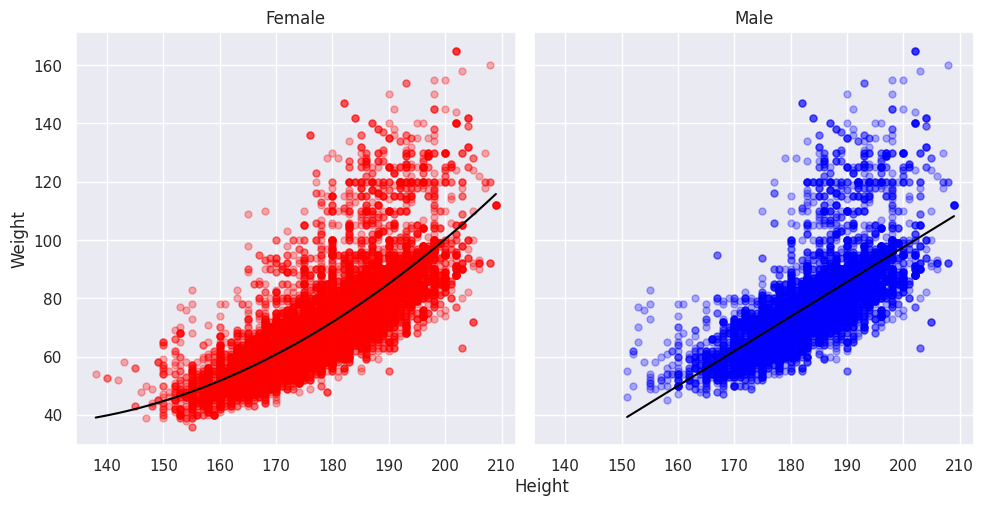

In [75]:
fig, ax = plt.subplots(1,2, sharex=True, sharey=True, figsize=(10,5))


ax[0].scatter(x=athletesF.Height, y=athletesF.Weight, color='red', s=25, alpha=0.3)
ax[0].plot(np.unique(athletesF.Height),
         np.poly1d(np.polyfit(athletesF.Height, athletesF.Weight, 2))(np.unique(athletesF.Height)),
          color='black')

ax[1].scatter(x=athletesM.Height, y=athletesM.Weight, color='blue', s=25, alpha=0.3)
ax[1].plot(np.unique(athletesM.Height),
         np.poly1d(np.polyfit(athletesM.Height, athletesM.Weight, 1))(np.unique(athletesM.Height)),
          color='black')

ax[0].set_ylabel('Weight')
ax[1].set_title('Male')
ax[0].set_title('Female')

fig.text(0.55, 0.001, 'Height', ha='center')
plt.tight_layout()
plt.show()

Note that the trend seen in each panel, represented by the line, isn't perfectly linear, particularly for the female samples. How will this affect correlation test results?

In [76]:
# Perform Pearson and Spearman correlations of Height and Weight for females
pearcorr = stats.pearsonr(athletesF.Height, athletesF.Weight)
print(f'Female Pearson Correlation: {round(pearcorr[0],3)}, P-value: {round(pearcorr[1],3)}')

spearcorr = stats.spearmanr(athletesF.Height, athletesF.Weight)
print(f'\nFemale Spearman Correlation: {round(spearcorr[0],3)}, P-value: {round(spearcorr[1],3)}')


Female Pearson Correlation: 0.779, P-value: 0.0

Female Spearman Correlation: 0.844, P-value: 0.0


Notice how the Spearman correlation outperforms the Pearson correlation (by finding stronger correlation) in both cases. Non-parametric Spearman correlation works well for non-linear relationships.

**Kendall Rank Correlation**

Also commonly known as “Kendall’s tau  𝜏 coefficient”. Kendall’s Tau coefficient and Spearman’s rank correlation coefficient assess statistical associations based on the ranks of the data. Kendall rank correlation (non-parametric) is an alternative to Pearson’s correlation (parametric) when the data you’re working with has failed one or more assumptions of the test. This is also the best alternative to Spearman correlation (non-parametric) when your sample size is small and has many tied ranks.

Kendall rank correlation is used to test the similarities in the ordering of data when it is ranked by quantities. Other types of correlation coefficients use the observations as the basis of the correlation, Kendall’s correlation coefficient uses pairs of observations and determines the strength of association based on the patter on concordance and discordance between the pairs.

* Concordant: Ordered in the same way (consistency). A pair of observations is considered concordant if (x2 — x1) and (y2 — y1) have the same sign.
* Discordant: Ordered differently (inconsistency). A pair of observations is considered concordant if (x2 — x1) and (y2 — y1) have opposite signs.

Kendall’s Tau coefficient of correlation is usually smaller values than Spearman’s rho correlation. The calculations are based on concordant and discordant pairs. Insensitive to error. P values are more accurate with smaller sample sizes.

**Questions that Kendall rank correlation answers:**

* Correlation between a student’s exam grade (A, B, C…) and the time spent studying put in categories (< 2 hours, 2–4 hours, 5–7 hours…)
* Customer satisfaction (e.g. Very Satisfied, Somewhat Satisfied, Neutral…) and delivery time (< 30 Minutes, 30 minutes — 1 Hour, 1–2 Hours etc)

In [77]:
# Example of the Kendall's Rank Correlation Test
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]

stat, p = stats.kendalltau(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p >= 0.05:
    print('\nProbably independent')
else:
    print('\nProbably dependent')

stat=0.733, p=0.002

Probably dependent
